<a href="https://colab.research.google.com/github/clarehchao/3DImageVolumeToMovie/blob/master/TimeUse_World_GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How American People Use Their Time**
- Data source: [How People Spend their time Article](https://ourworldindata.org/time-use#who-do-we-spend-time-with-across-our-lifetime)
- Learn how to create interactive visualization similar to the ones shown in the article using Plotly visualization package
- Explore data to see what visualizatio works or not and include details to further enhance the visualization


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
# init_notebook_mode(connected=True)
# import plotly.io as pio


# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
fdir = '/content/drive/MyDrive/UseofTimeWork'
fname1 = '{}/time-spent-with-relationships-by-age-us.csv'.format(fdir)
df1 = pd.read_csv(fname1)
# df1.head()

In [3]:
# convert to long form data
col_name_change_dict = {'Time spent alone, by age of respondent (United States)': 'Alone',
            'Time spent with friends, by age of respondent (United States)': 'Friends',
            'Time spent with children, by age of respondent (United States)': 'Children',
            'Time spent with with parents, siblings and other family, by age of respondent (United States)': 'Parents, siblings, families',
            'Time spent with partner, by age of respondent (United States)': 'Partner',
            'Time spent with coworkers, by age of respondent (United States)': 'Coworkers'}
df1.rename(columns = col_name_change_dict, inplace = True)

col = df1.columns
id_vars = ['Entity','Code','Year']
val_vars = set(col) - set(id_vars)
df1_long = pd.melt(df1, id_vars=id_vars, value_vars=val_vars,var_name='People type',value_name='Time_mins')
# df1_long.head(10)

In [4]:
# define a function for plotting line plots for multiple categories
# with custom hover and annotations

def LinePlot_TimevsAge(df, xx, yy, cc):
    # df: input dataframe
    # xx: column name of x-axis data
    # yy: column name of y-axis data
    # cc: name of categorical data ('color' field of Plotly Line plot)
    fig = px.line(df, x=xx, y=yy, color=cc,
                 color_discrete_sequence=px.colors.qualitative.Plotly)
    fig.update_layout(
        width = 1000,
        height=750,
        xaxis_title={
            'text': '<b>Age</b>',
            'font': {'size': 13, 'family': 'Arial'}
        },
        yaxis_title={'text':'<b>Time spent with the people (mins)</b>',
                    'font':{'size': 13, 'family': 'Arial'}
        },
        title={'text':'<b>Who American People Spend Time with by Age </b>',
                    'font':{'size': 15, 'family': 'Arial'}
        },
        title_x=0.45, #ceneter the title to the middle, title_x btw 0 and 1
    ) # to bold font, use <b> </b> like HTML

    # edit hover info or template
    group_dict = {}
    for d in fig.data:
        # print('{}, {}'.format(d.legendgroup, d.line['color']))
        group_dict[d.legendgroup] = {'color':d.line['color'],'x_last':d.x[-1],'y_last':d.y[-1]}
        if d.name:
            tmp = '<b>With {}:</b> {}{{y:.2f}} mins<extra></extra>'.format(d.name,'%')
            d.hovertemplate = tmp

    # add text suffix y.o. so hover label shows '9 y.o.' instead of '9'
    # this is the closest way to change hover title when using x unified mode
    # look and see if more options come out in the future in Plotly package
    xaxis_format = {
        'ticksuffix': ' y.o.'
    }
    fig.update_layout(hovermode='x unified',
                      xaxis=xaxis_format,
                      showlegend=False)

    # instead of legend, add annotation for each group
    for k, val in group_dict.items():
        if k == 'Parents, siblings, families':
            txt = 'With Families'
        elif k == 'Alone':
            txt = k
        else:
            txt = 'With {}'.format(k)
        fig.add_annotation(
            x=val['x_last']+0.5
            , y=val['y_last']
            , text= txt
            , yanchor='auto'
            , showarrow=True
            , arrowhead=1
            , arrowsize=0.8
            , arrowwidth=1.5
            , arrowcolor=val['color']
            , ax=80
            , ay=0
            , font=dict(size=13, color=val['color'], family="Arial")
            , align="left")
    fig.show()

In [5]:
# line plot or area plot of the time data

# sort Time by descending order
# df1_sort = df1_long.sort_values(by='Time_mins',ascending=False)
# print(df1_sort)

LinePlot_TimevsAge(df1_long, 'Year', 'Time_mins', 'People type')

In [6]:
# Plotly line plot with ANIMATION FRAME
ppl_grp = ['Friends','Partner','Families','Children','Coworkers']
df2 = df1_long[df1_long['People type'].isin(ppl_grp)]

LinePlot_TimevsAge(df2, 'Year', 'Time_mins', 'People type')

In [7]:
#Try aggregating columns and rows: What happens if you sum up (or just use similar colors for) time spent with family
# (parents, partner, children) versus friends and coworkers?

# print(df1.isna().sum()) ==> no NaN number in the data

df1['Family'] = df1['Parents, siblings, families'] + df1['Children'] + df1['Partner']
df1['Friends and Coworkers'] = df1['Friends'] + df1['Coworkers']

# convert to long-form data with the selected summed columns
col_drop = col_name_change_dict.values()
col_all = df1.columns
col_of_interest = list(set(col_all) - set(col_drop))
df1_2 = df1[col_of_interest]

id_vars = ['Entity','Code','Year']
col_vars = df1_2.columns
val_vars = set(col_vars) - set(id_vars)
df1_2_long = pd.melt(df1_2, id_vars=id_vars, value_vars=val_vars,var_name='People type',value_name='Time_mins')

# plot lines of the combines data
LinePlot_TimevsAge(df1_2_long, 'Year', 'Time_mins', 'People type')

In [8]:
#Or compare “time spent alone” against “time spent with others”?
df1['Others'] = df1['Friends'] + df1['Coworkers'] + df1['Parents, siblings, families'] + df1['Children'] + df1['Partner']

# convert to long-form data with the selected summed columns
id_vars = ['Entity','Code','Year']
col_of_interest = id_vars + ['Alone','Others']
df1_3 = df1[col_of_interest]

col_vars = df1_3.columns
val_vars = set(col_vars) - set(id_vars)
df1_3_long = pd.melt(df1_3, id_vars=id_vars, value_vars=val_vars,var_name='People type',value_name='Time_mins')

# plot lines of the combines data
LinePlot_TimevsAge(df1_3_long, 'Year', 'Time_mins', 'People type')

### **Some thoughts re. Plotly Line plot for this data**
- the line without marker is sufficient to understand the trend of time spent with each group of people
- the line plot shows the trend of time over age and show which group people spend time most at each age
- Instead of legend, use annotation with arrows &#8592; to denote what each line represents. It seems to be easier to read visually than trying to read the legend and match it in our brain (more steps to make sense of the data)
- Nice to have and yet to figure out or wait for new Plotly new features:
    - In the hover display, **BOLD** the time spent for the group people with the highest time spent at that age
    - was not able to find out how display y-value in hover in descending order (update the order of Time spent for each group as one scrolls through x-axis) ==> not sure if this function exist or more involved like using javascript and etc..

In [9]:
# Or do the math on how many days people spent on average with the different groups of people in their twenties?
the_col = ['Alone','Friends','Children','Parents, siblings, families','Partner','Coworkers']
df1_20yo = df1.loc[(df1['Year'] >= 20) & (df1['Year'] <= 30),the_col]

df1_20yo_avg = df1_20yo.mean().reset_index()
df1_20yo_avg.columns = ['People Type','Avg Time mins']
df1_20yo_avg['Avg Time hrs'] = df1_20yo_avg['Avg Time mins']/60
fig = px.bar(df1_20yo_avg, x='People Type', y='Avg Time hrs',
            color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(
        width = 1000,
        height=500,
        xaxis_title={
            'text': '<b>People Type</b>',
            'font': {'size': 13, 'family': 'Arial'}
        },
        yaxis_title={'text':'<b>Average Time spent with the people (hrs)</b>',
                    'font':{'size': 13, 'family': 'Arial'}
        },
        title={'text':'<b>Average Time Spent with People for 20 - 30 y.o </b>',
                    'font':{'size': 15, 'family': 'Arial'}
        },
        title_x=0.50, #ceneter the title to the middle, title_x btw 0 and 1
        yaxis_tickformat = '.1f'
    ) # to bold font, use <b> </b> like HTML

fig.show()

Text(0.5, 1.0, 'Average time with people for 20 - 30 y.o.')

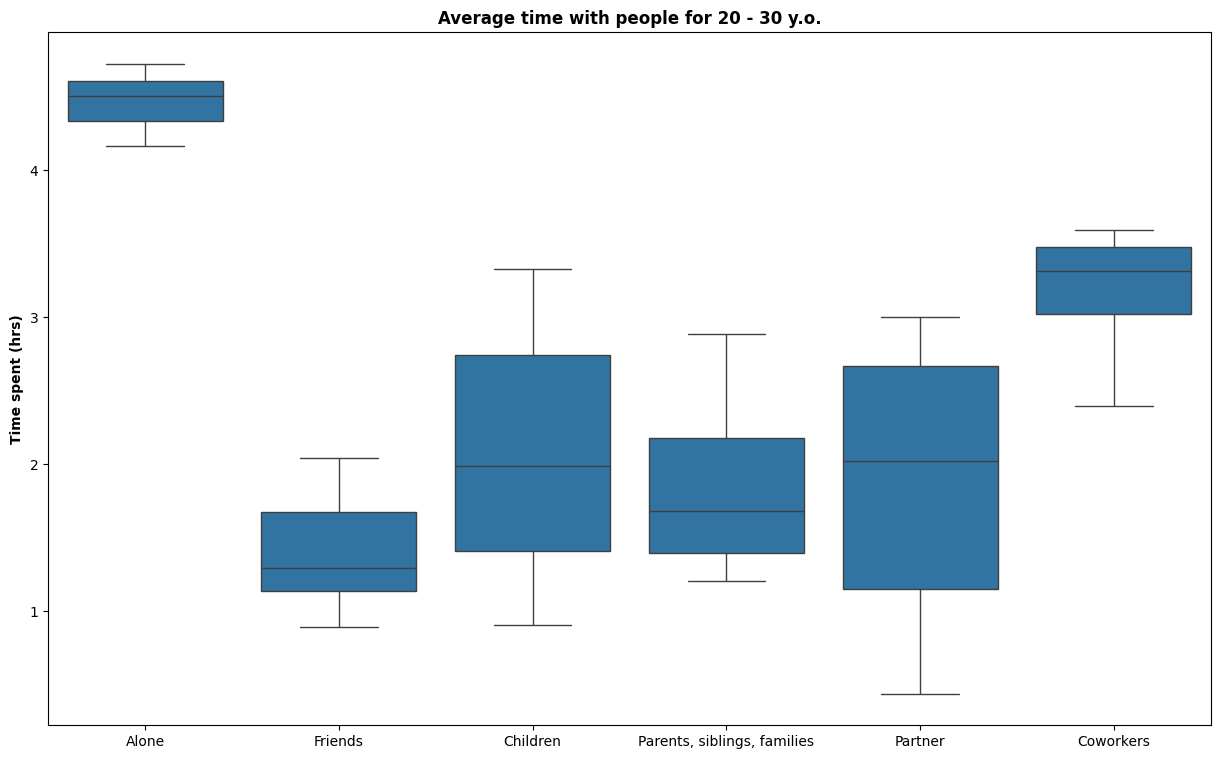

In [10]:
# can I do the same plot using seaborn? just don't have the hover function, but is it necessary for this plot?

# convert to long form
df1_20yo_long = pd.melt(df1_20yo, var_name='People Type', value_name='Time mins')
df1_20yo_long['Time hrs'] = df1_20yo_long['Time mins']/60
# print(df1_20yo_long)

fig, ax = plt.subplots(1,1,sharey=True,figsize=(15,9))
sns.set_theme(context='notebook')

sns.boxplot(x='People Type', y='Time hrs', data=df1_20yo_long)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Time spent (hrs)', fontweight='bold')
ax.set_xlabel('')
ax.set_title('Average time with people for 20 - 30 y.o.', fontweight='bold')

# fig.savefig('', dpi=300)

In [11]:
# Or compare 15–20 year olds with 40–45 year olds and show them as a simple bar chart
# create a new category columns to split the data into different age group (15 - 20 yo, 40-45 yo)

def func_agegrp(x):
    if x >= 15 and x <= 20:
        return '15 - 20 y.o.'
    elif x > 20 and x < 40:
        return '20 - 40 y.o.'
    elif x >= 40 and x <= 45:
        return '40 - 45 y.o.'
    else:
        return 'Above 45 y.o.'
df1['Age Group'] = df1.apply(lambda x: func_agegrp(x['Year']), axis=1)
# df1.head(10)

Text(0.5, 1.0, 'How do American People at Different Age Spend their Time')

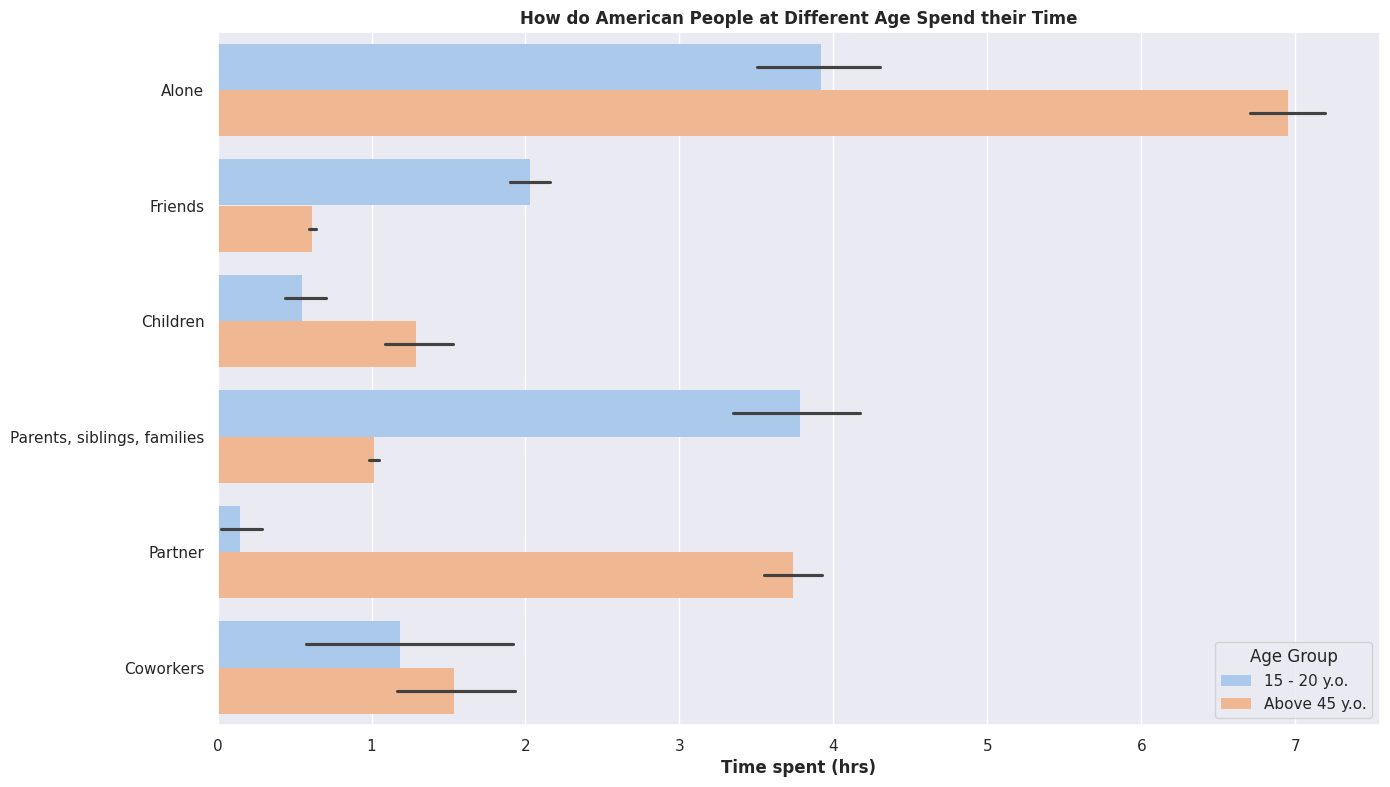

In [12]:
# visualization option: (a) seaborn bar plot with 2 age groups side-by-side,
# (b) Plotly bar chart by computing average and dropdown menu to select which 2 age groups to compare (2 dropdown menus)

# option (a) seaborn bar plot
# convert data to long format

the_col = ['Alone','Friends','Children','Parents, siblings, families','Partner','Coworkers']
id_vars = ['Entity','Code','Year','Age Group']
df1_original = df1[the_col + id_vars]
# print(df1_original.head(20))

df1_agegrp_long = pd.melt(df1_original, id_vars=id_vars,var_name='People Type', value_name='Time mins')
df1_agegrp_long['Time hrs'] = df1_agegrp_long['Time mins']/60
# print(df1_agegrp_long.dtypes)

fig, ax = plt.subplots(1,1,sharey=True,figsize=(15,9))
sns.set_theme(context='notebook')

agegrp_to_plot = ['15 - 20 y.o.','Above 45 y.o.']
# sns.boxplot(x='People Type', y='Time hrs', hue='Age Group', data=df1_agegrp_long,palette='pastel')
sns.barplot(x='Time hrs', y='People Type', hue='Age Group'
            ,data=df1_agegrp_long, hue_order = agegrp_to_plot
            ,palette='pastel', edgecolor='none')

# sns.barplot(x='Time hrs', y='People Type', hue='Age Group'
#             ,data=df1_agegrp_long,palette='pastel'
#             , edgecolor='none')
# ax.set_xticklabels(g.get_xticklabels(),rotation=30)
ax.set_ylabel('')
ax.set_xlabel('Time spent (hrs)', fontweight='bold')
ax.set_title('How do American People at Different Age Spend their Time', fontweight='bold')

In [13]:
# Vis Option (b) Plotly bar chart by computing average and dropdown menu to select which 2 age groups to compare (2 dropdown menus)
the_pplgrp_col = ['Alone','Friends','Children','Parents, siblings, families','Partner','Coworkers']

# convert time to HOURS from MINS
def mins_to_hours(x):
    return x/60
df1_original.loc[:,the_pplgrp_col] = df1_original[the_pplgrp_col].apply(mins_to_hours)

In [14]:
# Get avg Time spent vs People Type for ALL AGES
df1_allages = df1_original.loc[:, the_pplgrp_col]
df1_allages_avg = df1_allages.mean().reset_index()
df1_allages_avg.columns = ['People Type','All Ages']
# print(df1_allages_avg)

# Get avg Time spent vs People Type for Age Groups
df1_agegrp = df1_original.loc[:, the_pplgrp_col+['Age Group']]
df1_agegrp_avg = df1_agegrp.groupby('Age Group').mean().T.reset_index(names=['People Type'])
df1_agegrp_avg.columns.name = ''
# print(df1_agegrp_avg)

# merge avg Time with Age Groups with All Ages
df1_age_all = df1_allages_avg.merge(df1_agegrp_avg, on='People Type')
# print(df1_age_all)

fig = px.bar(df1_age_all, x='People Type', y=['15 - 20 y.o.','40 - 45 y.o.'],
            color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(
    hovermode = 'x unified',
    showlegend=False,
    barmode = 'group',
    width = 1000,
    height=600,
    xaxis_title={'text': ''},
    yaxis_title={
        'text': '<b>Average time spent with the people (hrs)</b>',
        'font': {'size': 15, 'family': 'Arial'}
    },
    title={'text':'<b>Who American People Spend Time with by Age Groups </b>',
                'font':{'size': 18, 'family': 'Arial'}
    },
    xaxis={'tickfont':{'size': 13, 'family': 'Arial Black'}},  # to bold yaxis label, use 'font name'+ Black as family in tickfont dict
    title_x=0.51
)


# add dropdown buttons to select Which Age Group to plot 2 bar grouped charts
button1 = []
button2 = []
age_grps = list(set(df1_age_all.columns) - set(['People Type']))
for gg in age_grps:
    button1.append(dict(method='restyle',
                        label= gg,
                        visible=True,
                        args=[{'y':[df1_age_all[gg]],'name':gg}, [0]], # the [0] at the end lets us know they are for the first trace
                        )
                  )
    button2.append(dict(method='restyle',
                        label= gg,
                        visible=True,
                        args=[{'y':[df1_age_all[gg]],'name':gg}, [1]], # the [0] at the end lets us know they are for the first trace
                        )
                  )

# customize hover data display
# NOTE: there is no way to customize the text display using x-unified setting; changing x-axis text does NOT change the hover display
# it seems that the hover display uses x-axis text not x-axis value?
figdata = fig.data
bar_color = []
for ii in range(len(figdata)):
    bb = figdata[ii]
    bar_color.append(bb.marker['color'])
    tmp = '<b>{}</b><br>{}{{y:.2f}} hrs<extra></extra>'.format(bb.legendgroup,'%')
    bb.hovertemplate = tmp


# set dropdown buttons placement and etc
button_height = 0.7
updatemenus = list([
    dict(buttons=button1,
         direction="down",
         showactive=True,
         x=0.1,
         y=1.16,
         xanchor="center",
         yanchor="top",
         bgcolor=bar_color[0]),
    dict(buttons=button2,
         direction="down",
         showactive=True,
         x=0.1,
         y=1.09,
         xanchor="center",
         yanchor="top",
         bgcolor=bar_color[1])])

fig.update_layout(updatemenus=updatemenus)
fig.show()

# NOTE: Dash can be good to make similar visualization with dropdown menu and create a dashboard

In [15]:
# Try stacked bar chart with Plotly: Plotly take in wide-format, not just long format
# print(df1_agegrp_long.head(20))

the_df = df1_agegrp_long.drop(['Entity','Code','Year','Time mins'], axis=1)
# print(the_df.head(50))

# first need to aggregate data
oh = the_df.groupby(['Age Group','People Type']).mean().reset_index()

fig = px.bar(oh, x='Time hrs', y='Age Group', color='People Type',
             color_discrete_sequence=px.colors.qualitative.T10,
             custom_data = ['People Type'])

fig.update_layout(
    width = 1100,
    height=600,
    xaxis_title={
        'text': '<b>Average time spent with the people (hrs)</b>',
        'font': {'size': 15, 'family': 'Arial'}
    },
    yaxis_title='',
    title={'text':'<b>Who American People Spend Time with by Age Groups </b>',
                'font':{'size': 15, 'family': 'Arial'}
    },
    yaxis={'tickfont':{'size': 13, 'family': 'Arial Black'}},  # to bold yaxis label, use 'font name'+ Black as family in tickfont dict
    title_x=0.45, #ceneter the title to the middle, title_x btw 0 and 1
) # to bold font, use <b> </b> like HTML)

fig.update_traces(
    hovertemplate = '<i>With <b>%{customdata[0]}</b></i>'+'<br><b>%{x:.2f} hrs</b><br><extra></extra>'
)
fig.show()

### Thoughts:
- In my opinion, the seaborn bar chart (displayed in groups horizontally) was not as visually clear since our brain needs to do a bit more work to make sense of the plot (figure out what color bar is which people group) and it takes time to figure out who people spend most time with at different age group
- The idea of stacked bar plot came to mind
    - Inspired by [the porportion bar plot of How People Spend Their Time](https://ourworldindata.org/time-use#who-do-we-spend-time-with-across-our-lifetime)
    - Plotly offered an easy way to plot stacked bar chart (simipler than seaborn and needed a simple aggregate via groupby) and interactive with hoover option
    - The [Plotly stacked bar plot](https://plotly.com/python/bar-charts/) is much more clear and easier for people to understand the data content with customized hoover data display
    - Less brain power to figure out which color is what group and the stack bars help to see which people group each age group spend most with

#### Notes to myself:
- [Things to keep in mind when using Seaborn to plot](https://michaelwaskom.medium.com/three-common-seaborn-difficulties-10fdd0cc2a8b)

In [16]:
# Plot Area plot of the time data
fig = px.area(df1_long, x='Year', y='Time_mins', color='People type')

fig.update_layout(
    width = 1000,
    height=500,
    xaxis_title={
        'text': '<b>Age</b>',
        'font': {'size': 13, 'family': 'Arial'}
    },
    yaxis_title={'text':'<b>Time spent with the people (mins)</b>',
                'font':{'size': 13, 'family': 'Arial'}
    },
    title={'text':'<b>Who American People Spend Time with by Age </b>',
                'font':{'size': 15, 'family': 'Arial'}
    },
    title_x=0.45, #ceneter the title to the middle, title_x btw 0 and 1
    hovermode='x unified'
) # to bold font, use <b> </b> like HTML

fig.update_traces(mode="markers+lines",
                 hovertemplate='%{y:.2f} mins'
                 )
fig.show()

### **Thoughts**:
- Don't know how to edit hover text format with x-unified option using Plotly. Can only format the how to display next to all the different options. (continue to look for solutions)
- Area plot is used to show the sum of all the values at each x point and see the contribution of each group to the sum
- For this data Time spent vs Age, <strong>the area plot</strong> is <em>NOT USEFUL</em> because the area plot mask the trend of time over age and the summation and contribution of the time from each group is not important to understand the data

#### **Thoughts on Tableau**:
- Tableau has lots of sophisticated visualization options and easy and quick to build the dashboard with visualization
- For a short morning of exploring, there are still much to learn to how to make plots with more manual data manipulation
- Keep Tableau in mind for specific visuals but will likely stick with Python Seaborn and Plotly since coding makes things easily reproducible

In [17]:
fname3 = '{}/percentage-of-americans-living-alone-by-age.csv'.format(fdir)
df3 = pd.read_csv(fname3)
# print(df3.head(20))

In [18]:
cate_types = df3['Entity'].unique()
cate_order = list(reversed(cate_types))

fig = px.line(df3, x='Year', y='Percentage of Americans living alone, by age, total (IPUMS)',
              color='Entity',
              category_orders={'Entity':cate_order},
              # animation_frame = 'Year',
              color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(
    width = 1000,
    height=750,
    xaxis_title={
        'text': '<b>Year</b>',
        'font': {'size': 15, 'family': 'Arial'}
    },
    yaxis_title={'text':''},
    title={'text':'<b>Percentage of Americans Living Along, by Age</b>',
                'font':{'size': 20, 'family': 'Arial'}
    },

    title_x=0.55,
    # yaxis_tickformat = '.0%', # use this when the data is in decimal ratio form, not percent (otherwise, it will display x*100 %)
    yaxis_ticksuffix = '%'
)

# ensure it's line + dots
fig.update_traces(mode="markers+lines")

# edit hover info or template
for d in fig.data:
  if d.name:
      tmp = '<b>{}</b>  {}{{y:.2f}}{}<extra></extra>'.format(d.name,'%','%')
      d.hovertemplate = tmp

fig.update_layout(hovermode='x unified',
                  showlegend=False)
fig.show()

**Thoughts re. visualization**
- To control the hover data order, one can change the order of scatter plots by specifying category_orders = {'column name': [a,b,c,d,...]}
- For this data, a line/marker plot is suitable instead of bar chart with hover data display and the ease of seeing the data trend
- Nice to have: animate the plot by displaying data by selecting 'Year' and update the amount of data shown in the figure (example: select year 1920, only show data from year 1920 and on etc.)



In [19]:
fname4 = '{}/Time-Use-in-OECD-Countries-OECD - Time Use (OECD).csv'.format(fdir)
df4 = pd.read_csv(fname4)
# print(df4['Category'].unique())

# need to pivot dataframe loong form to short form data frame so i can combine columns and drop unnecessary ones for plotting
df4_piv = df4.pivot(index = 'Country', columns='Category', values='Time (minutes)').reset_index()
tmp = [ss.rstrip() for ss in df4_piv.columns]
df4_piv.columns = tmp

# combine categories for simpler presentation
df4_piv['Other unpaid work, care work and volunteer'] = df4_piv['Other unpaid work & volunteering'] + df4_piv['Care for household members']
df4_piv['Housework and shopping'] = df4_piv['Housework'] + df4_piv['Shopping']
df4_piv['Other leisure'] = df4_piv['Other leisure activities'] + df4_piv['Sports'] + df4_piv['Attending events']

In [20]:
# How do people spend their time in the World (country data)
# some visualization options: stacked bar plots, scatter geo plots with circle show in different time of use category (hover data)

# stacked bar chart with annotation of time spent in each bar segment
# (similar the one in ourworldindata.org)
# time for each country is summed up to ~ 24hrs

time_use_cat_order = ['Paid work','Education','Sleep', 'Other unpaid work, care work and volunteer',
                      'Housework and shopping','Personal care','Eating and drinking','TV and Radio',
                      'Seeing friends','Other leisure']

df4_combinecat = df4_piv.loc[:,['Country']+time_use_cat_order]
# print(df4_combinecat.columns)


# convert to long form data
df4_combinecat_long = pd.melt(df4_combinecat, id_vars=['Country'], value_vars=time_use_cat_order,
        var_name='Category', value_name='Time (minutes)')
fig = px.bar(df4_combinecat_long, x = 'Time (minutes)', y = 'Country', color='Category',
             category_orders = {'Category':time_use_cat_order},
             color_discrete_sequence=px.colors.qualitative.Prism,
             text_auto=True, custom_data = ['Category'])

# fix x and y axis label and add annotations instead of legend for more clarity?
fig.update_layout(
    width = 1000,
    height=900,
    xaxis_title={
        'text': '<b>Time (min)</b>',
        'font': {'size': 15, 'family': 'Arial'}
    },
    yaxis_title={'text':''},
    title={'text':'<b>How do People Spend Their Time in the World</b>',
                'font':{'size': 20, 'family': 'Arial'}
    },
    title_x=0.55,
    showlegend=False,
    yaxis={'tickfont':{'size': 13, 'family': 'Arial Black'}}
)

fig.update_traces(
    hovertemplate = '<i>In <b>%{y}</b></i>, spend <b>%{x:.0f} mins</b><br>on %{customdata[0]}<extra></extra>'
)
fig.show()

In [21]:
#scatter geo plots via plotly of the same data
# print(df4_combinecat_long.head(50))
# print(df4_combinecat_long.loc[df4_combinecat_long.isna().any(axis=1),:])
df4_combinecat_long.dropna(inplace=True)

In [22]:
fig = px.scatter_geo(df4_combinecat_long,
                     locations='Country',
                     hover_name='Country', # Display country name on hover
                     size='Time (minutes)', # Size of points by population
                     locationmode='country names',
                     animation_frame='Category',
                     height=700,
                     width=1000,
                     custom_data=['Country','Time (minutes)','Category']
                     )

fig.update_layout(
    title={'text':'<b>How do People Spend Their Time in the World</b>',
           'font':{'size': 20, 'family': 'Arial'}
    },
    title_x=0.5
)

fig.update_traces(
    hovertemplate = '<i>In <b>%{customdata[0]}</b></i>, spend <b>%{customdata[1]} mins</b><br>on %{customdata[2]}<extra></extra>'
)

fig.show()

#### **Thoughts re. visualization:**
- The world data of how people spend their time works best with the horizontal stacked bar chart as presented in the ourworldindata bar chart
- I made an animated map figure with bubble size corresponding to the time spent in each country shown on map. While the map show the location of the data, the map didn't add new insight to visualization
- The time spent in each category is similar in each country. It was hard to see which country spend the most time in each category with the geo scatter plot
- The geo scatter plot can be much suitable for other data and purpose

